# Some basic plots for the presentation #covid19

In [1]:
import numpy as np
import pandas as pd

In [17]:
#Getting the datafile from GitHub
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df = pd.read_csv(url)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,6,6,7,7,11,14,14,15
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,15,15,16,17,20,20,21,22,22,23
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,44,58,86,105,130,152,173,193,205,235
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,12,14,15,16,17,18,21,22,23,25
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


### Create a map of all the locations that are tracked in the dataset

In [3]:
import folium


def generateBaseMap(default_location=[33.682861, -6.088247], default_zoom_start=2):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [4]:
scatter_map = generateBaseMap()

latlon = df[['Lat','Long']]

for i in range(latlon.shape[0]):
    folium.CircleMarker(location=[latlon.iloc[i,0], latlon.iloc[i,1]],
                       radius=0.1,
                       popup="Slut_placering",
                       color='red',
                       fill=True,
                       fill_color='red').add_to(scatter_map)
scatter_map

### Create a bar plot for confirmed cases in all countries

In [5]:
#Creating a list with all the column names that containes information about number of confirmed cases
col_list= list(df)
remove_list= ['Province/State','Country/Region','Lat','Long']

for i in remove_list:
    col_list.remove(i)
#col_list

In [6]:
bar_data = df[['Province/State', 'Country/Region']].copy()
bar_data['Yesterday'] = df.iloc[:,-1]
#bar_data['Cum_con_cases'] = df[col_list].sum(axis=1)
bar_data.set_index(['Province/State', 'Country/Region'],inplace=True)
bar_data.head()

Yesterday
Province/State Country/Region           
NaN            Afghanistan            15
               Albania                23
               Algeria               235
               Andorra                25
               Angola                  2

In [66]:
bar_data = bar_data[0:30]

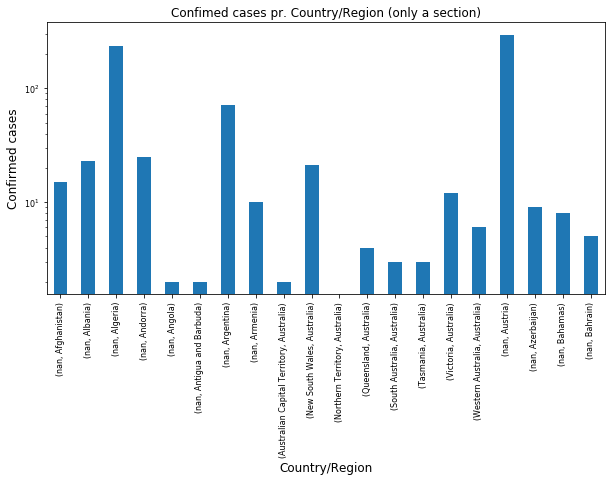

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = bar_data.Yesterday.plot(kind='bar', title ="Confimed cases pr. Country/Region (only a section)", figsize=(10, 5), legend=False, fontsize=12)
ax.set_yscale('log')
ax.set_xlabel("Country/Region", fontsize=12)
ax.set_ylabel("Confirmed cases", fontsize=12)
# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.xticks(rotation=90)
#plt.savefig('foo.png')
plt.show()

### Total confirmed COVID-19 cases per country and world

In [18]:
#Creating a world row that sums all cases around the world
df_graph = df.copy()

df_graph.loc['World']= df_graph[col_list].sum()
df_graph = df_graph.reset_index(drop = True)
df_graph.iloc[-1, df.columns.get_loc('Country/Region')] = 'World'

df_graph = df_graph.drop('Lat', 1)
df_graph = df_graph.drop('Long', 1)

df_graph.set_index(['Province/State', 'Country/Region'],inplace=True)

In [31]:
df_graph.tail()
df_graph.shape

(264, 79)

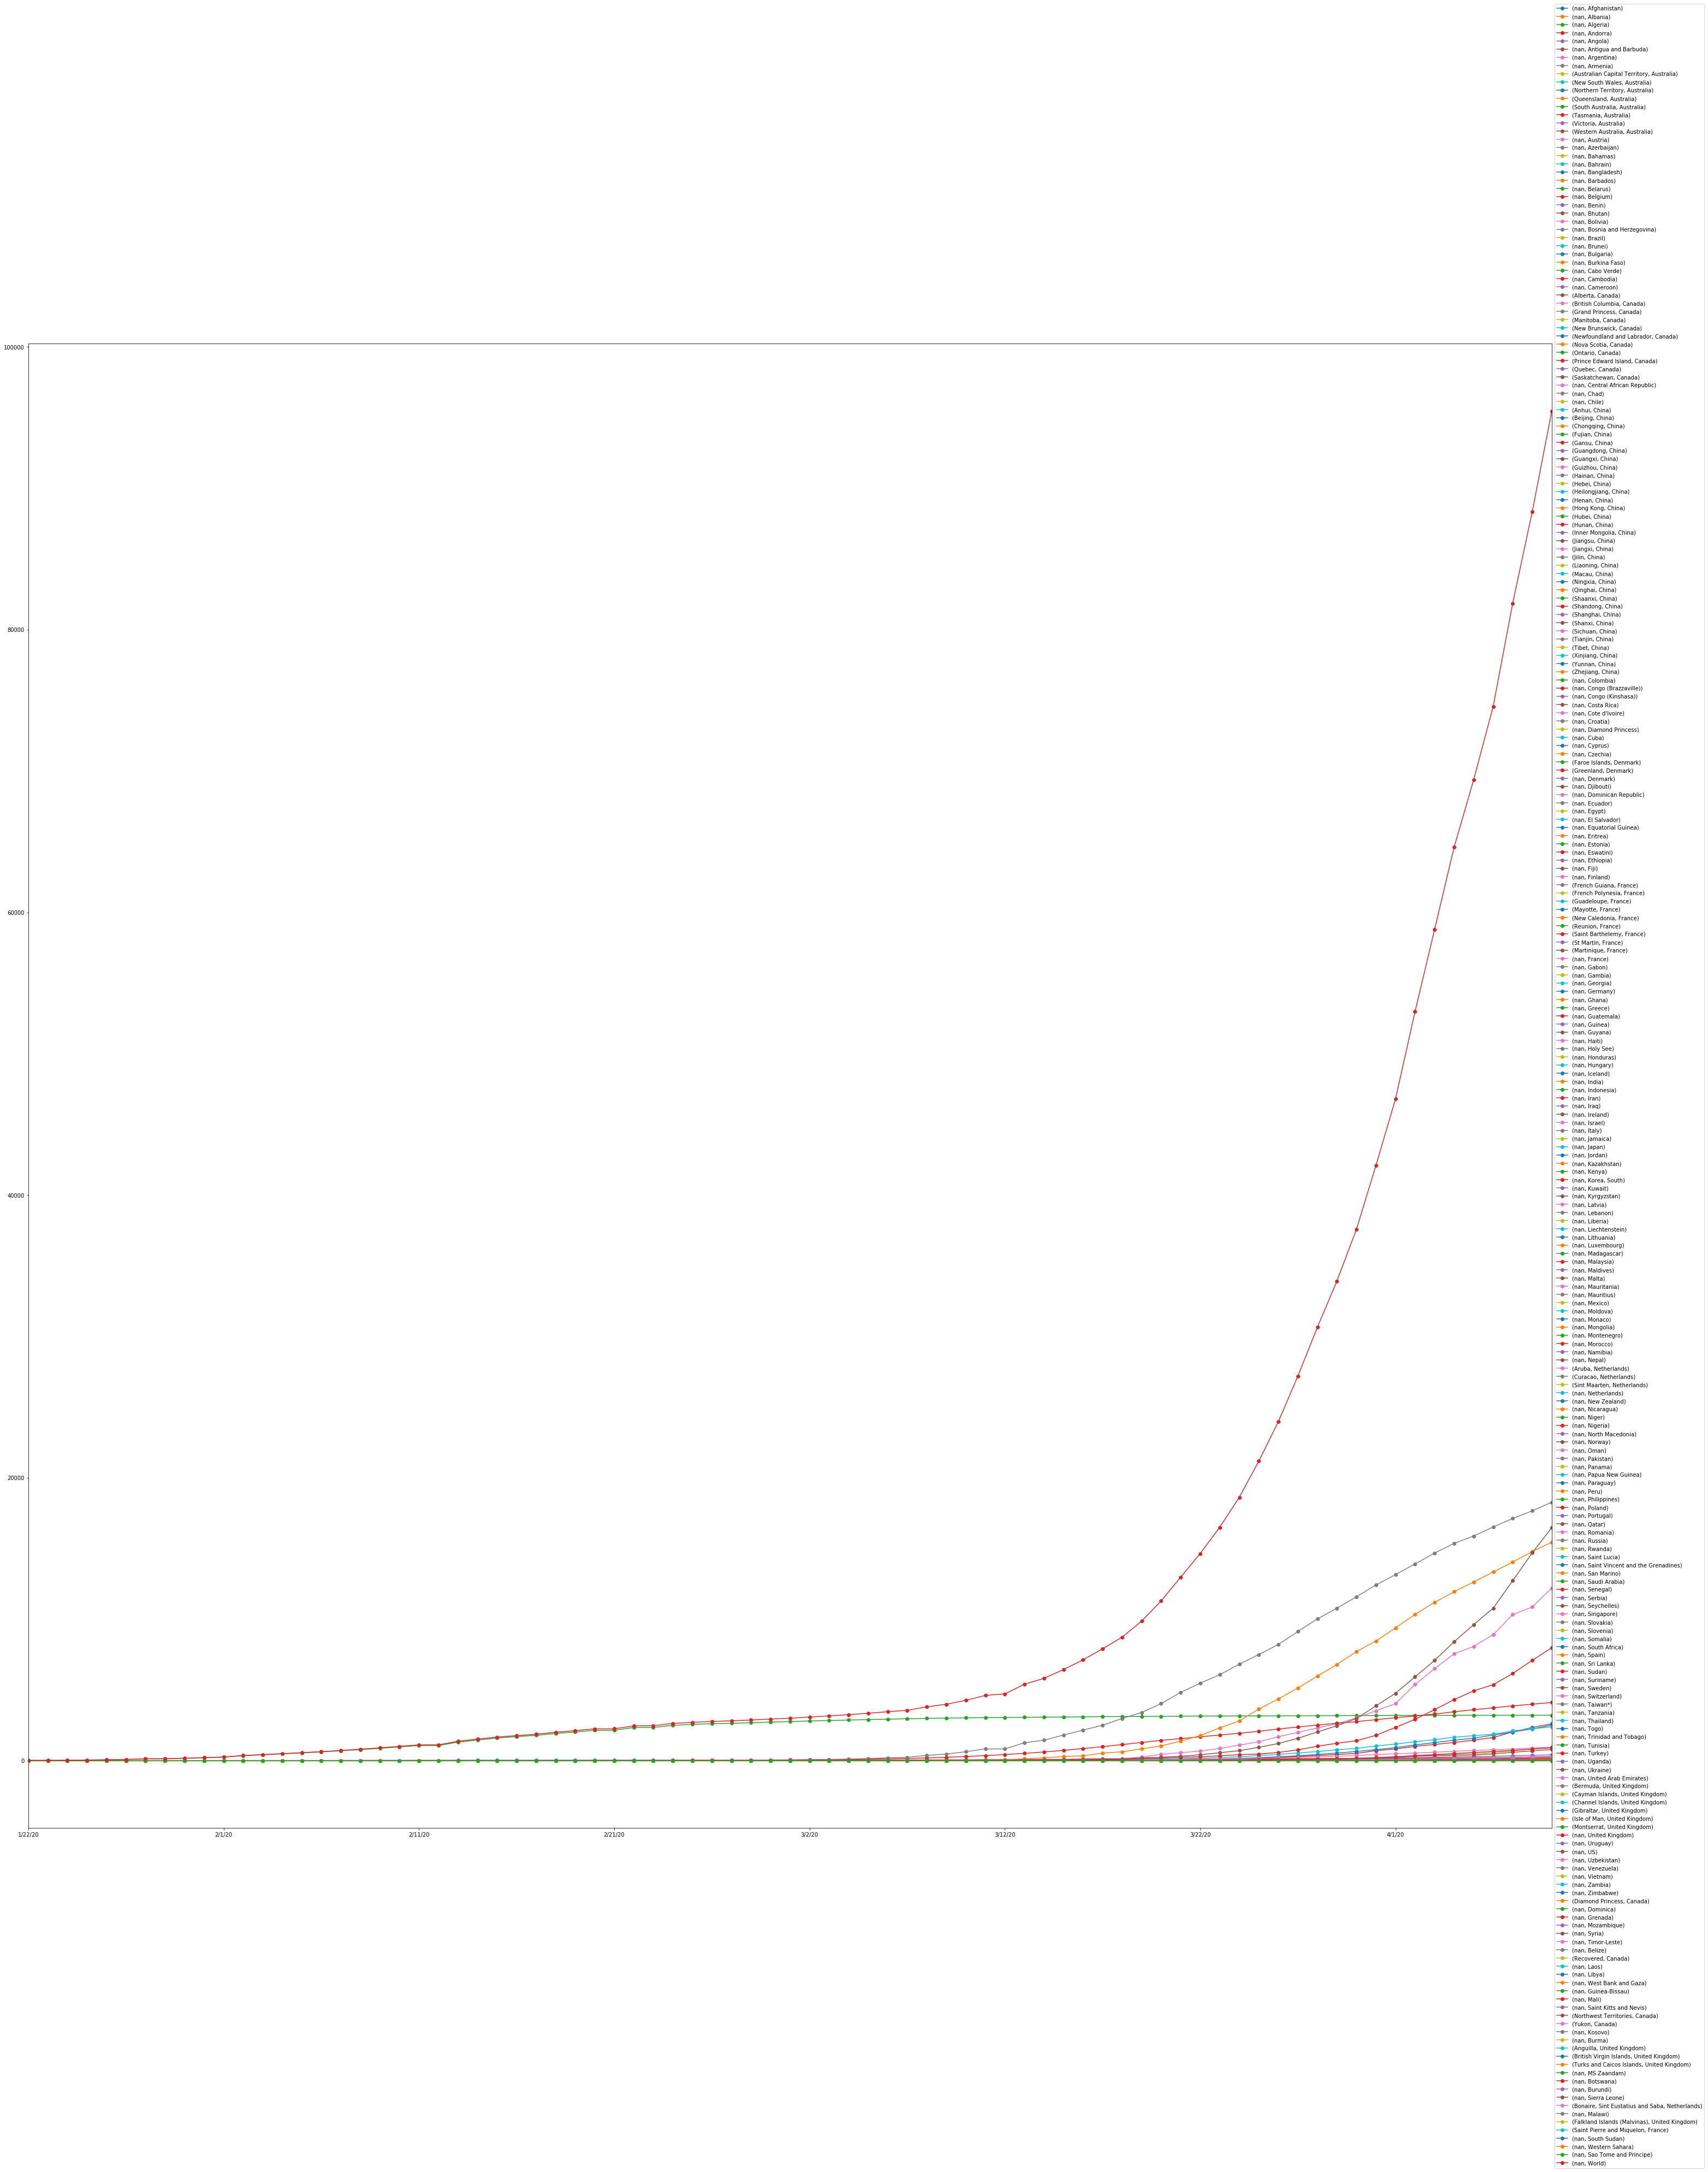

In [51]:
df_graph.T.plot(figsize=(50, 50),marker='o').legend(loc='center left',bbox_to_anchor=(1.0, 0.5));


### Plot a the development for a single country

In [44]:
df_graph_1 = df_graph.T
df_graph_1.tail()

Province/State         NaN                                                     \
Country/Region Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
4/5/20                 7.0    20.0   152.0    18.0    2.0                 0.0   
4/6/20                11.0    21.0   173.0    21.0    2.0                 0.0   
4/7/20                14.0    22.0   193.0    22.0    2.0                 1.0   
4/8/20                14.0    22.0   205.0    23.0    2.0                 2.0   
4/9/20                15.0    23.0   235.0    25.0    2.0                 2.0   

Province/State                   Australian Capital Territory New South Wales  \
Country/Region Argentina Armenia                    Australia       Australia   
4/5/20              44.0     7.0                          2.0            16.0   
4/6/20              48.0     8.0                          2.0            18.0   
4/7/20              56.0     8.0                          2.0            21.0   
4/8/20              63.0     9.0                          2.0            21.0   
4/9/20              72.0    10.0                          2.0            21.0   

Province/State  ...     NaN              Bonaire, Sint Eustatius and Saba  \
Country/Region  ... Burundi Sierra Leone                      Netherlands   
4/5/20          ...     0.0          0.0                              0.0   
4/6/20          ...     0.0          0.0                              0.0   
4/7/20          ...     0.0          0.0                              0.0   
4/8/20          ...     0.0          0.0                              0.0   
4/9/20          ...     0.0          0.0                              0.0   

Province/State    NaN Falkland Islands (Malvinas) Saint Pierre and Miquelon  \
Country/Region Malawi              United Kingdom                    France   
4/5/20            0.0                         0.0                       0.0   
4/6/20            0.0                         0.0                       0.0   
4/7/20            1.0                         0.0                       0.0   
4/8/20            1.0                         0.0                       0.0   
4/9/20            1.0                         0.0                       0.0   

Province/State         NaN                                                
Country/Region South Sudan Western Sahara Sao Tome and Principe    World  
4/5/20                 0.0            0.0                   0.0  69374.0  
4/6/20                 0.0            0.0                   0.0  74565.0  
4/7/20                 0.0            0.0                   0.0  81865.0  
4/8/20                 0.0            0.0                   0.0  88338.0  
4/9/20                 0.0            0.0                   0.0  95455.0  

[5 rows x 264 columns]

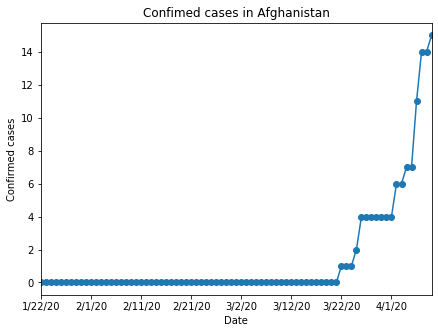

In [64]:
ax = df_graph_1.iloc[:,0].plot(figsize=(7, 5),marker='o',title ="Confimed cases in Afghanistan");
ax.set_xlabel("Date", fontsize=10);
ax.set_ylabel("Confirmed cases", fontsize=10);